In [1]:
# Importing libraries
import pandas as pd
from pathlib import Path
import csv
from config import api_key
import requests
from pprint import pprint
import random


In [2]:
csv_path = Path("../Resources/global air pollution dataset.csv")
global_df = pd.read_csv(csv_path)
global_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
global_df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [4]:
NorthAmerica_df = global_df.loc[global_df['Country'].isin(['United States of America', 'Canada', 'Mexico'])]
NorthAmerica_df.head()
NorthAmerica_df.count()

Country               3601
City                  3601
AQI Value             3601
AQI Category          3601
CO AQI Value          3601
CO AQI Category       3601
Ozone AQI Value       3601
Ozone AQI Category    3601
NO2 AQI Value         3601
NO2 AQI Category      3601
PM2.5 AQI Value       3601
PM2.5 AQI Category    3601
dtype: int64

In [5]:
unique_cities = NorthAmerica_df[['Country', 'City']].drop_duplicates().reset_index(drop=True)
cities_list = unique_cities['City']
cities_list.to_csv('../Resources/cities_list.csv')
unique_cities.to_csv('../Resources/citiesandcountry_list.csv')

# Making a list of cities. This is the entire list of 3601 countries 
list_cities = cities_list.to_list()

# Randomized list of 500 cities. This is probably better for plotting and to avoid hitting API limit
random_cities = random.sample(list_cities,50) # change to 500 or any number you want

# Shortened list of cities. Use this for testing code to avoid hitting API limit
short_cities = cities_list.head(3).tolist()


In [6]:
random_cities

['Pennsville',
 'Miami Springs',
 'Greeley',
 'Binghamton',
 'Zihuatanejo',
 'Ansonia',
 'Progreso Industrial',
 'Tonawanda',
 'Depew',
 'Waianae',
 'Milford',
 'Parkville',
 'Holly Hill',
 'Soddy Daisy',
 'San Luis Obispo',
 'Pearl City',
 'Grass Valley',
 'Ixtepec',
 'Seminole',
 'Zacapu',
 'Cedar Grove',
 'Periban',
 'Lower Burrell',
 'Bennington',
 'Gardner',
 'Tulsa',
 'Little Falls',
 'Noblesville',
 'La Orilla',
 'Ives Estates',
 'Saint Matthews',
 'Ladson',
 'Susanville',
 'Bedford Heights',
 'Palm Bay',
 'South Lake Tahoe',
 'Waltham',
 'Atencingo',
 'Elyria',
 'Navolato',
 'Dzitbalche',
 'Massapequa Park',
 'Coyotepec',
 'Conroe',
 'Cayey',
 'Kaysville',
 'Passaic',
 'Auburn',
 'Kennebunk',
 'Waterloo']

In [7]:
# Acessing the open weather API to get lattitude and longitude values

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Making API calls
lat = []
lon = []

# loop through list of cities
for city in random_cities:
    #print (city)
    
    response = requests.get(query_url + city).json()
    try:
        #print (response)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
    except Exception as e:
        print(f'city not found or {e}')
        pass

city not found or 'coord'
city not found or 'coord'


In [8]:
# Accessing the open weather API to get air pollution values

air_url = 'http://api.openweathermap.org/data/2.5/air_pollution?' # current air pollution values

coord = [] # latitude and longitude coordinates
aqi = [] # air quality index
co = [] # Concentration of CO (Carbon monoxide), μg/m3
nh3 = [] # Concentration of NO (Nitrogen monoxide), μg/m3
no = [] # Сoncentration of NO2 (Nitrogen dioxide), μg/m3
no2 = [] # Сoncentration of O3 (Ozone), μg/m3
o3 = [] # Сoncentration of SO2 (Sulphur dioxide), μg/m3
pm10 = [] # Сoncentration of PM2.5 (Fine particles matter),
pm2_5 = [] # Сoncentration of PM10 (Coarse particulate matter), μg/m3
so2 = [] # Сoncentration of NH3 (Ammonia), μg/m3


for lt,ln in zip(lat,lon):
    response = requests.get(f'{air_url}lat={lt}&lon={ln}&appid={api_key}').json()
    #pprint (response)
    try:
        coord.append(response['coord'])
        aqi.append(response['list'][0]['main']['aqi'])
        co.append(response['list'][0]['components']['co'])
        nh3.append(response['list'][0]['components']['nh3'])
        no.append(response['list'][0]['components']['no'])
        no2.append(response['list'][0]['components']['no2'])
        o3.append(response['list'][0]['components']['o3'])
        pm10.append(response['list'][0]['components']['pm10'])
        pm2_5.append(response['list'][0]['components']['pm2_5'])
        so2.append(response['list'][0]['components']['so2'])
    except Exception as e:
        print (f'failed to get values for lat:{lt} and lon:{ln}. Error is: {e}')

top 10 cities with the highest PM2.5 levels using Matplotlib - Global

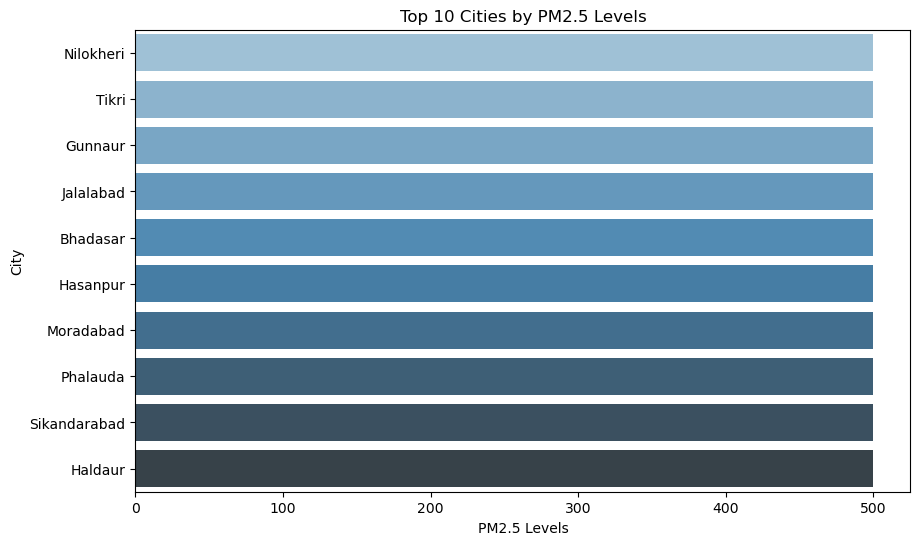

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by PM2.5 levels and select the top 10 cities
top_10_pm25 = global_df.sort_values(by='PM2.5 AQI Value', ascending=False).head(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='PM2.5 AQI Value', y='City', data=top_10_pm25, palette='Blues_d')
plt.title('Top 10 Cities by PM2.5 Levels')
plt.xlabel('PM2.5 Levels')
plt.ylabel('City')
plt.show()


top 10 cities with the highest PM2.5 levels using Matplotlib - North America

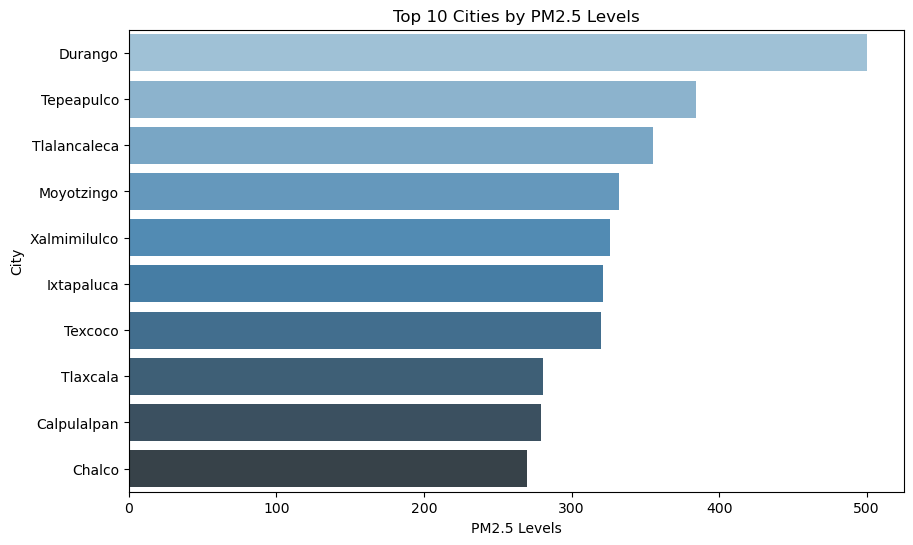

In [34]:
# Sort the data by PM2.5 levels and select the top 10 cities
top_10_pm25 = NorthAmerica_df.sort_values(by='PM2.5 AQI Value', ascending=False).head(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='PM2.5 AQI Value', y='City', data=top_10_pm25, palette='Blues_d')
plt.title('Top 10 Cities by PM2.5 Levels')
plt.xlabel('PM2.5 Levels')
plt.ylabel('City')
plt.show()


Distribution of PM2.5 Levels - Global

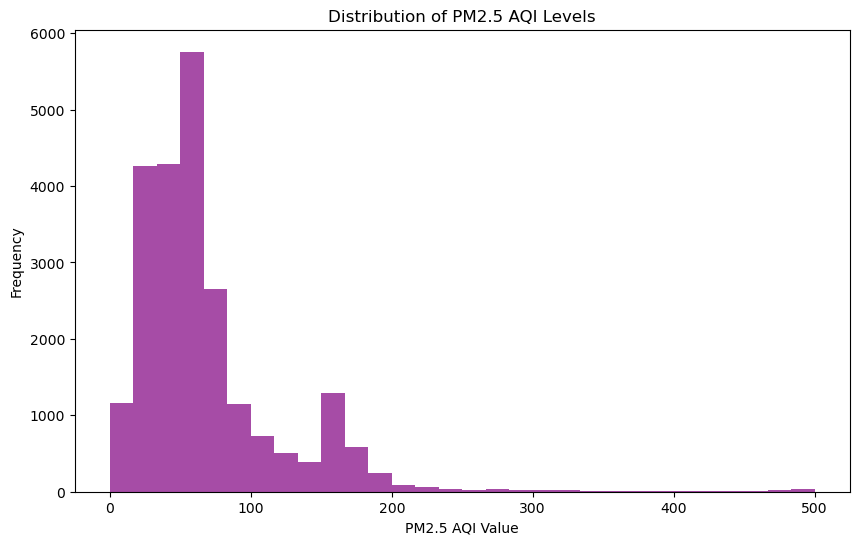

In [19]:
# Create a histogram to show the distribution of PM2.5 levels
plt.figure(figsize=(10, 6))
plt.hist(global_df['PM2.5 AQI Value'], bins=30, color='purple', alpha=0.7)
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 AQI Levels')
plt.show()

Distribution of PM2.5 Levels - North America

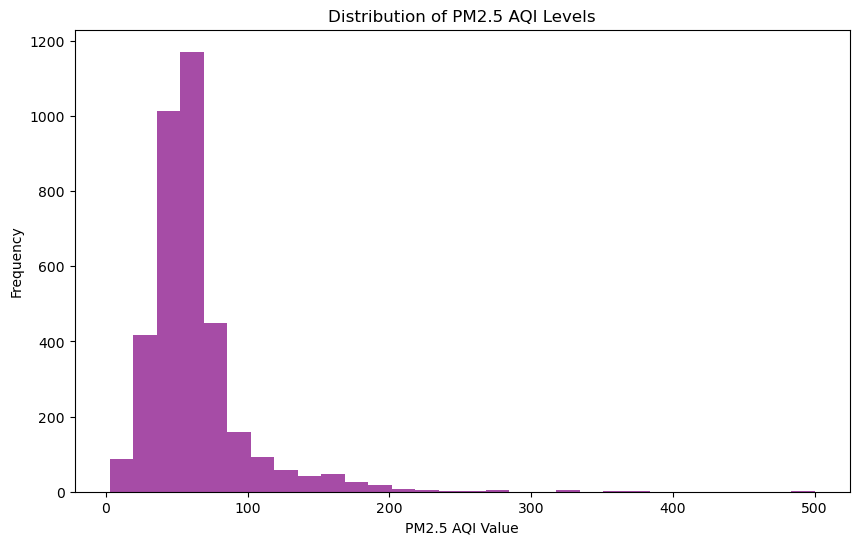

In [20]:
# Create a histogram to show the distribution of PM2.5 levels
plt.figure(figsize=(10, 6))
plt.hist(NorthAmerica_df['PM2.5 AQI Value'], bins=30, color='purple', alpha=0.7)
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 AQI Levels')
plt.show()

PM2.5 Levels by Country

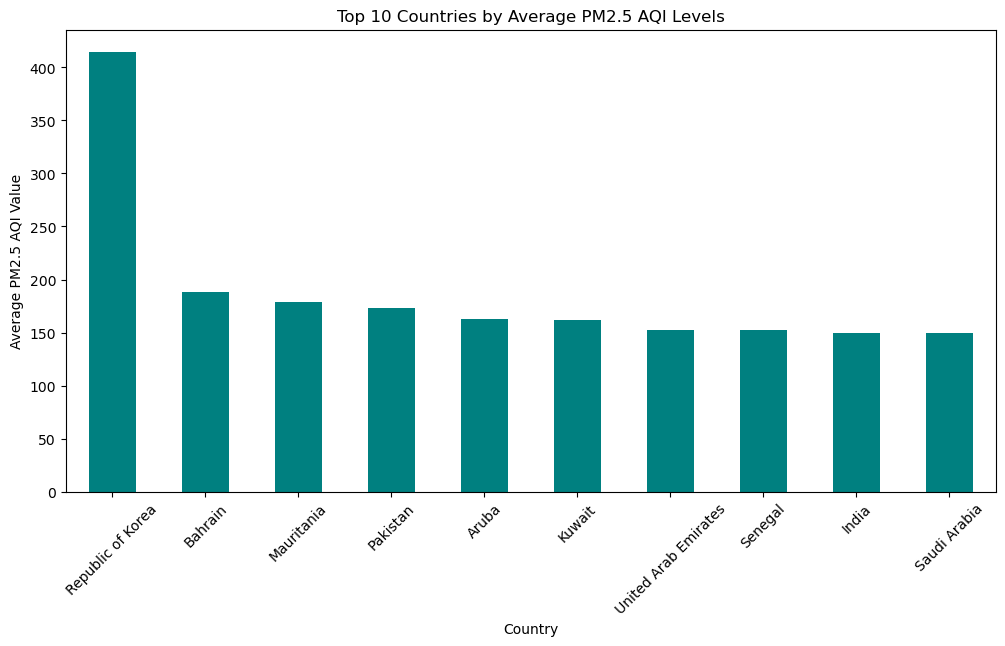

In [23]:
# Group by country and calculate the mean PM2.5 AQI Value
pm25_by_country = global_df.groupby('Country')['PM2.5 AQI Value'].mean().sort_values(ascending=False).head(10)

# Create a bar plot to show the average PM2.5 levels by country
plt.figure(figsize=(12, 6))
pm25_by_country.plot(kind='bar', color='teal')
plt.xlabel('Country')
plt.ylabel('Average PM2.5 AQI Value')
plt.title('Top 10 Countries by Average PM2.5 AQI Levels')
plt.xticks(rotation=45)
plt.show()

Top Cities with the Best Air Quality - Global

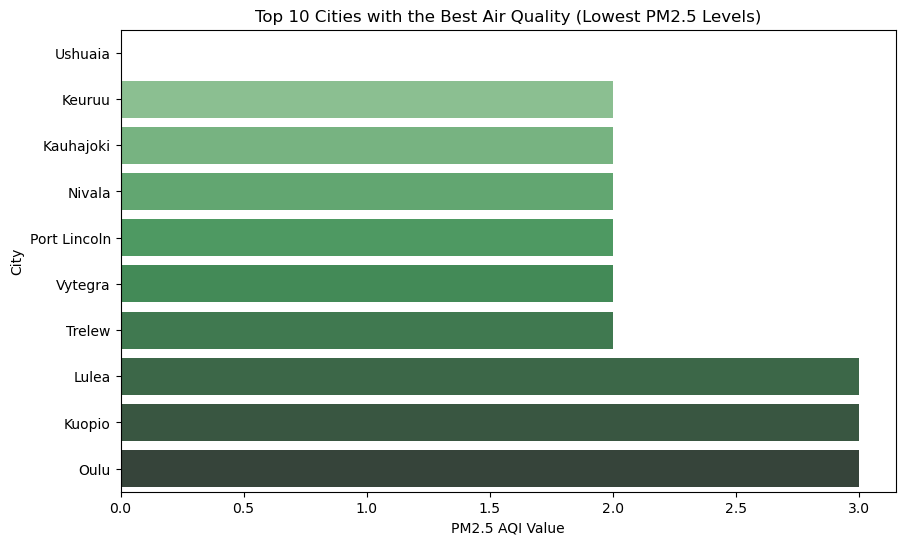

In [36]:
# Sort the data by PM2.5 AQI Value and select the top 10 cities with the lowest levels
best_10_pm25 = global_df.sort_values(by='PM2.5 AQI Value', ascending=True).head(10)

# Plot a horizontal bar chart for best air quality cities
plt.figure(figsize=(10, 6))
sns.barplot(x='PM2.5 AQI Value', y='City', data=best_10_pm25, palette='Greens_d')
plt.title('Top 10 Cities with the Best Air Quality (Lowest PM2.5 Levels)')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('City')
plt.show()

Top Cities with the Best Air Quality - North America

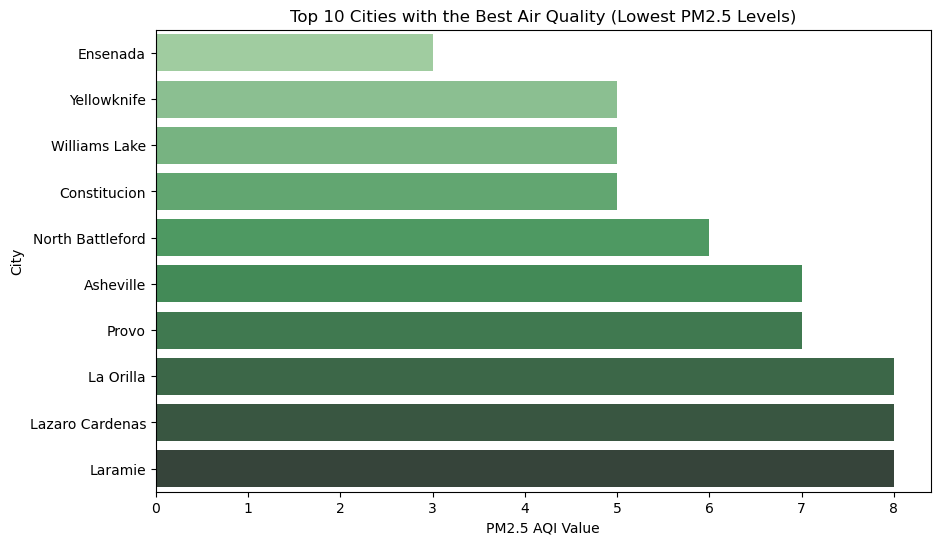

In [37]:
# Sort the data by PM2.5 AQI Value and select the top 10 cities with the lowest levels
best_10_pm25 = NorthAmerica_df.sort_values(by='PM2.5 AQI Value', ascending=True).head(10)

# Plot a horizontal bar chart for best air quality cities
plt.figure(figsize=(10, 6))
sns.barplot(x='PM2.5 AQI Value', y='City', data=best_10_pm25, palette='Greens_d')
plt.title('Top 10 Cities with the Best Air Quality (Lowest PM2.5 Levels)')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('City')
plt.show()

Comparing Different Pollutants in Toronto over time

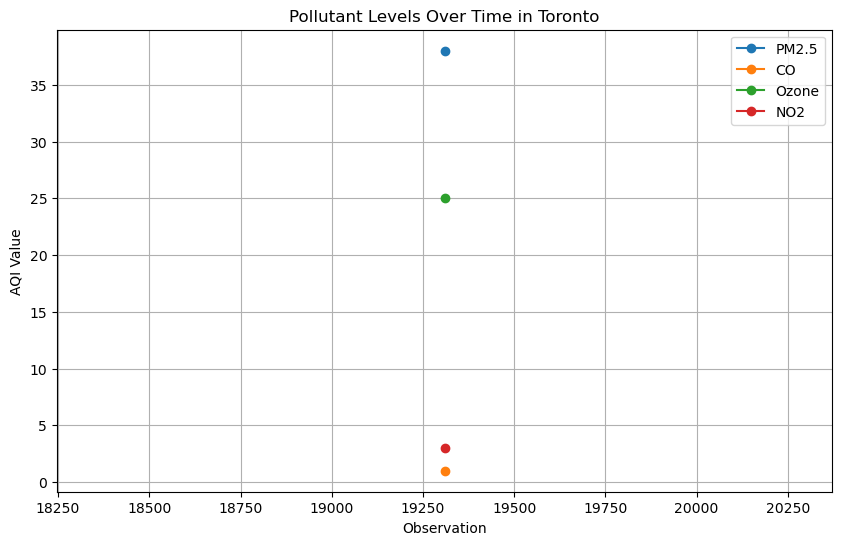

In [39]:
# Filter data for a specific city
city_name = 'Toronto'
city_data = air_quality_data[air_quality_data['City'] == city_name]

# Plot a line chart for different pollutants
plt.figure(figsize=(10, 6))
plt.plot(city_data.index, city_data['PM2.5 AQI Value'], marker='o', label='PM2.5')
plt.plot(city_data.index, city_data['CO AQI Value'], marker='o', label='CO')
plt.plot(city_data.index, city_data['Ozone AQI Value'], marker='o', label='Ozone')
plt.plot(city_data.index, city_data['NO2 AQI Value'], marker='o', label='NO2')
plt.title(f'Pollutant Levels Over Time in {city_name}')
plt.xlabel('Observation')
plt.ylabel('AQI Value')
plt.legend()
plt.grid(True)
plt.show()


Bar Plot of AQI Categories by Country - North America

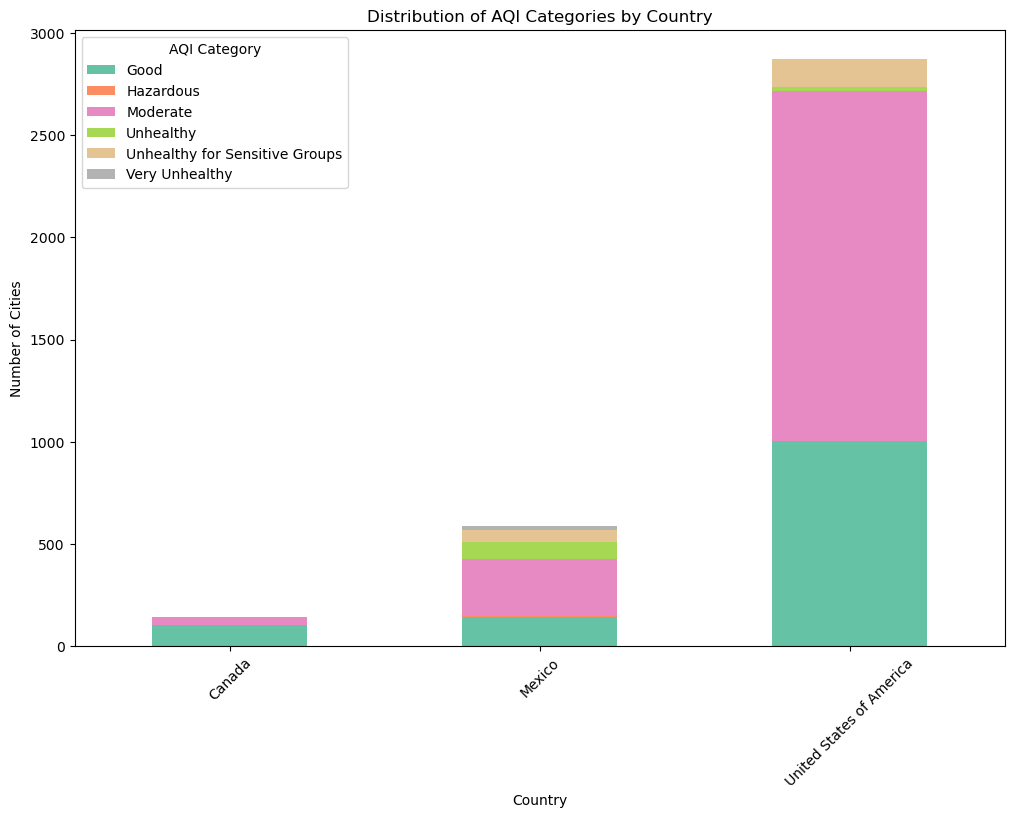

In [41]:
# Group by country and AQI category, then count occurrences
aqi_by_country = NorthAmerica_df.groupby(['Country', 'AQI Category']).size().unstack()

# Plot a stacked bar chart
aqi_by_country.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Distribution of AQI Categories by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45)
plt.show()
